In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (3.1) Basic Terminology

In [41]:
haberman = pd.read_csv("haberman.csv")

### Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) <br>
-- 1 = the patient survived 5 years or longer <br>
-- 2 = the patient died within 5 year


### Little Bit Info About The Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### Objective

To classify/predict a patient survival who had undergone surgery for breast cancer.

In [42]:
datapoints, features = haberman.shape
print("This dataaset is having", datapoints, "datapoints and", features, "features")

This dataaset is having 306 datapoints and 4 features


In [43]:
# Q. What are the column names of the dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [44]:
# Q. Print the top 5 datapoints of the dataset
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [45]:
# Q. Describe the dataset
print(haberman.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [46]:
# Q. How many classes are there in the dataset and how many datapoints per class?
info = dict(haberman["status"].value_counts())
print("There are", len(info), "class in the haberman.csv")
print()
for _class, datapoints in info.items():
    print("There are", datapoints, "datapoints in", _class, "class." )

There are 2 class in the haberman.csv

There are 225 datapoints in 1 class.
There are 81 datapoints in 2 class.


# Histogram, PDF, CDF

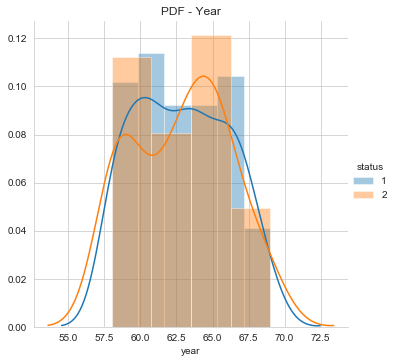

In [47]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF - Year")
plt.show()

### Conclusion
Here's the area under the PDF curve of both the class are highly overlapped (approx 90% - 95%) and both the curve have similar spread. <br> Hence, we can't use "year" to predict the survival of patients.

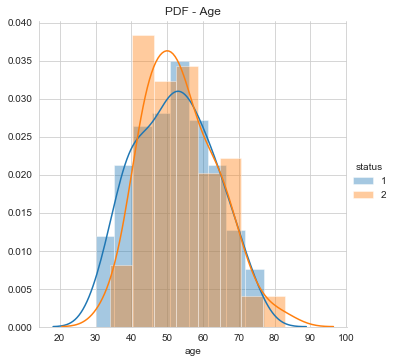

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF - Age")
plt.show()

### Conclusion
Here's the area under the PDF curve of both the classes are highly overlapped (approx 85% - 95%) and both the curve have similar spread. <br> Hence, we can't use "age" to predict the survival of patients.

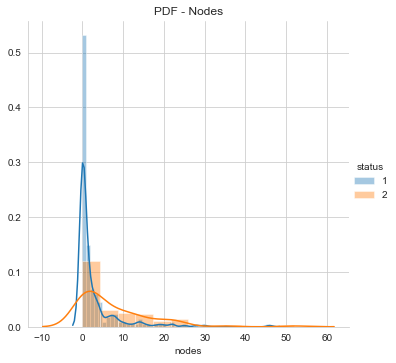

In [49]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF - Nodes")
plt.show()

### Conclusion
Here's the area under the PDF curve of both the class are highly overlapped (approx 75% - 85%) but both the curve don't have similar spread. The curve for `status 1` is quite narrower than `status 2` in the range of [0, 5] <br>
Hence, we can't use "nodes" to predict the survival of patients, but still let try to get some insights when nodes is equals to `zero` or `0`

In [50]:
# Doubt!
# Why using 
# haberman.loc[haberman["nodes"] == 0]["status"].value_counts()  instead of
# haberman[haberman["nodes"] == 0]["status"].value_counts()

# Solution:
# https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc

haberman.loc[haberman["nodes"] == 0]["status"].value_counts()
print(haberman.loc[haberman["nodes"] == 0]["status"].value_counts())


1    117
2     19
Name: status, dtype: int64


### Conclusion
1. There is no gurantee if person having 0 nodes will survive 5 years or longer <br/>
-- 1. 86% people having 0 nodes survived 5 years or longer <br/>
-- 2. 14% people having 0 nodes died within 5 years
2. There is higher chances of surviving 5 year or longer for a patient having 0 nodes.

# (3.4) [ii] CDF

In [51]:
haberman_status_1 = haberman.loc[haberman["status"] == 1]
haberman_status_2 = haberman.loc[haberman["status"] == 2]

In [52]:
haberman_status_1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [53]:
haberman_status_2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


pdf [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin_edges [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


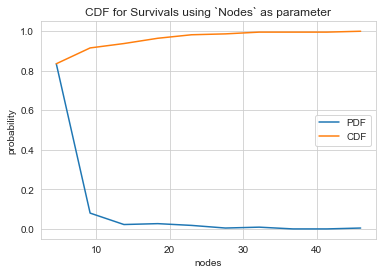

In [54]:
# status 1
counts, bin_edges = np.histogram(haberman_status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")


# # status 2
# counts, bin_edges = np.histogram(haberman_status_2['nodes'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Survivals using `Nodes` as parameter")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show();

### Conclusion
1. Here we can clearly conclude that 80% - 90% of the survivals had node less than 10 and there are approx. 1% - 2% of survivals had greater than 25 node.
2. There is inversly proportional relationship between nodes and chances of surviving.

pdf [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


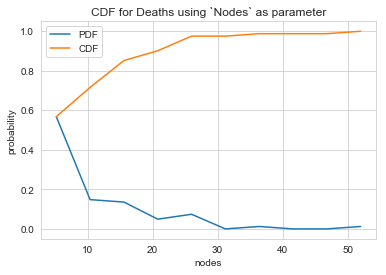

In [55]:
# # status 1
# counts, bin_edges = np.histogram(haberman_status_1['nodes'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")


# status 2
counts, bin_edges = np.histogram(haberman_status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Deaths using `Nodes` as parameter")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show();

### Conclusion
1. Here we can clearly conclude that 60% - 70% patient who dies within 5 years had nodes less than 10 and approx. 1% - 2% of patient died within 5 years had greater than 35 node.

pdf [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
bin_edges [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


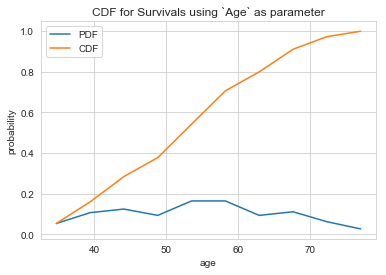

In [56]:
# status 1
counts, bin_edges = np.histogram(haberman_status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")


# # status 2
# counts, bin_edges = np.histogram(haberman_status_2['age'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Survivals using `Age` as parameter")
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()
plt.show();

### Conclusion
1. Patients of age between 50-60 have 35% - 45% chances of surviving.

pdf [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bin_edges [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


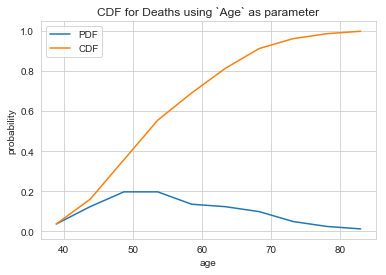

In [57]:
# # status 1
# counts, bin_edges = np.histogram(haberman_status_1['age'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")


# status 2
counts, bin_edges = np.histogram(haberman_status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Deaths using `Age` as parameter")
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()
plt.show();

### Conclusion
1. Patients of age between 45 - 55 have highest chances of not surviving.
2. 90% of the patient who didn't survived, their age is 68 and below 68
3. 10% of the patient who didn't survived, their age is above 68

pdf [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
bin_edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


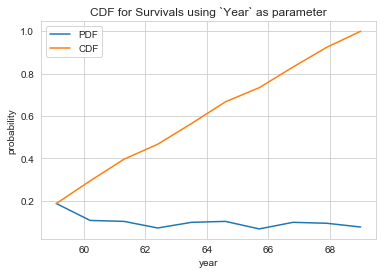

In [58]:
# status 1
counts, bin_edges = np.histogram(haberman_status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")

# # status 2
# counts, bin_edges = np.histogram(haberman_status_2['year'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Survivals using `Year` as parameter")
plt.xlabel("year")
plt.ylabel("probability")
plt.legend()
plt.show();

### Conclusion
1. If we see the PDF curve we can say that it's a decreasing curve with ups and downs. From this we can interpret that in early years the chances of survival is higher than later years
2. Before 1960 the chances of survival is the highest.

pdf [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
bin_edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


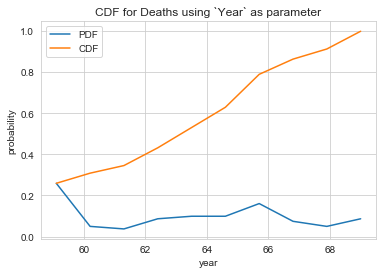

In [59]:
# # status 1
# counts, bin_edges = np.histogram(haberman_status_1['year'], bins=10, 
#                                  density = True)
# pdf = counts/(sum(counts))
# print("pdf", pdf);
# print("bin_edges", bin_edges)

# #compute CDF
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf, label="PDF")
# plt.plot(bin_edges[1:], cdf, label="CDF")

# status 2
counts, bin_edges = np.histogram(haberman_status_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf", pdf);
print("bin_edges", bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")

plt.title("CDF for Deaths using `Year` as parameter")
plt.xlabel("year")
plt.ylabel("probability")
plt.legend()
plt.show()

### Conclusion
1. 80% patient died within 5 years who had went under surgery before 1966
2. Before 1960 the patient died within 5 years in majority.

# Box plot and Whiskers

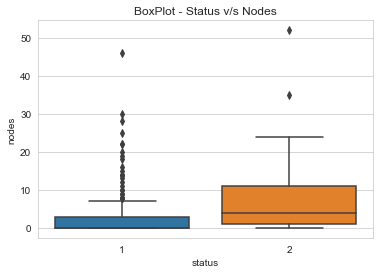

In [60]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)

plt.title("BoxPlot - Status v/s Nodes")
plt.show()

### Conclusion
1. Approx. 50% of the patitents who survived had 0 nodes and 75% patients who survived had less than 4 nodes.

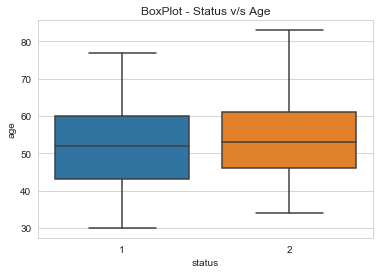

In [61]:
sns.boxplot(x='status',y='age', data=haberman)

plt.title("BoxPlot - Status v/s Age")
plt.show()

### Conclusion
1. 25% of the patitents who survived where from the age below 42.
2. 25% of the patitents who died within 5 year where from the age below 47.

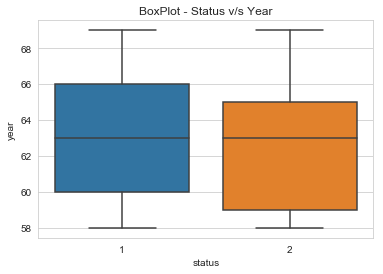

In [62]:
sns.boxplot(x='status',y='year', data=haberman)

plt.title("BoxPlot - Status v/s Year")
plt.show()

### Conclusion
1. 25% of the patitents who survived, had went under surgery before 1960
2. 25% of the patitents who died within 5 year, went under surgery before 1959

# Violin plots

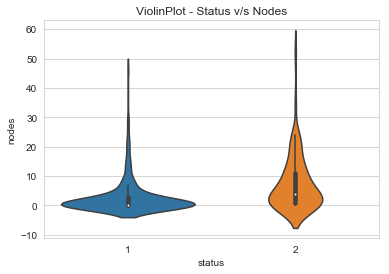

In [63]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, height=8)

plt.title("ViolinPlot - Status v/s Nodes")
plt.show()

### Conclusion
1. We can clearly depict from the diagram that, those who survived after surgery had `0` node mostly (almost 50%).


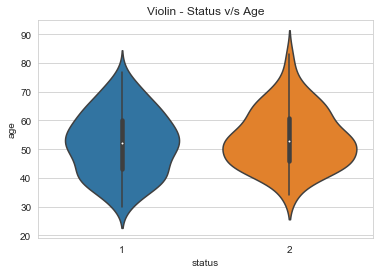

In [64]:
sns.violinplot(x="status", y="age", data=haberman, height=8)

plt.title("Violin - Status v/s Age")
plt.show()

### Conclusion
1. Age group of 50-60 have highest chances of survival.
2. Age group of 45-55 have lowest chances of survival.

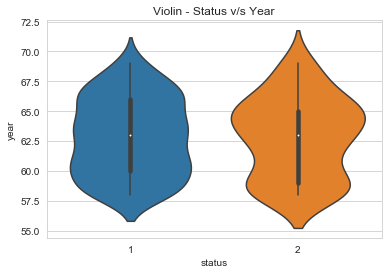

In [65]:
sns.violinplot(x="status", y="year", data=haberman, height=8)

plt.title("Violin - Status v/s Year")
plt.show()

# Scatter Plot

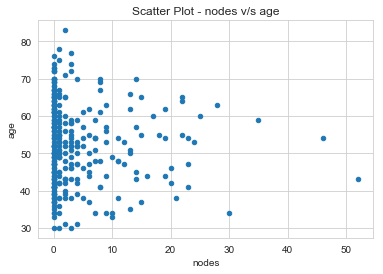

In [66]:
haberman.plot(kind="scatter", x="nodes", y="age")

plt.title("Scatter Plot - nodes v/s age")
plt.show()

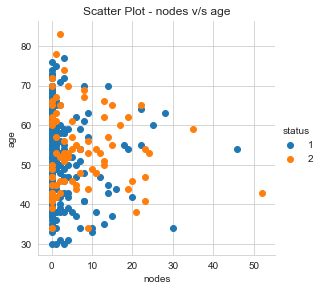

In [67]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();

plt.title("Scatter Plot - nodes v/s age")
plt.show();

### Conclusion

We can't conclude anything using scatter plot as the data points are highly overlapped and we can't seperate the classes using any line or curve or plane.

# Pair-plot

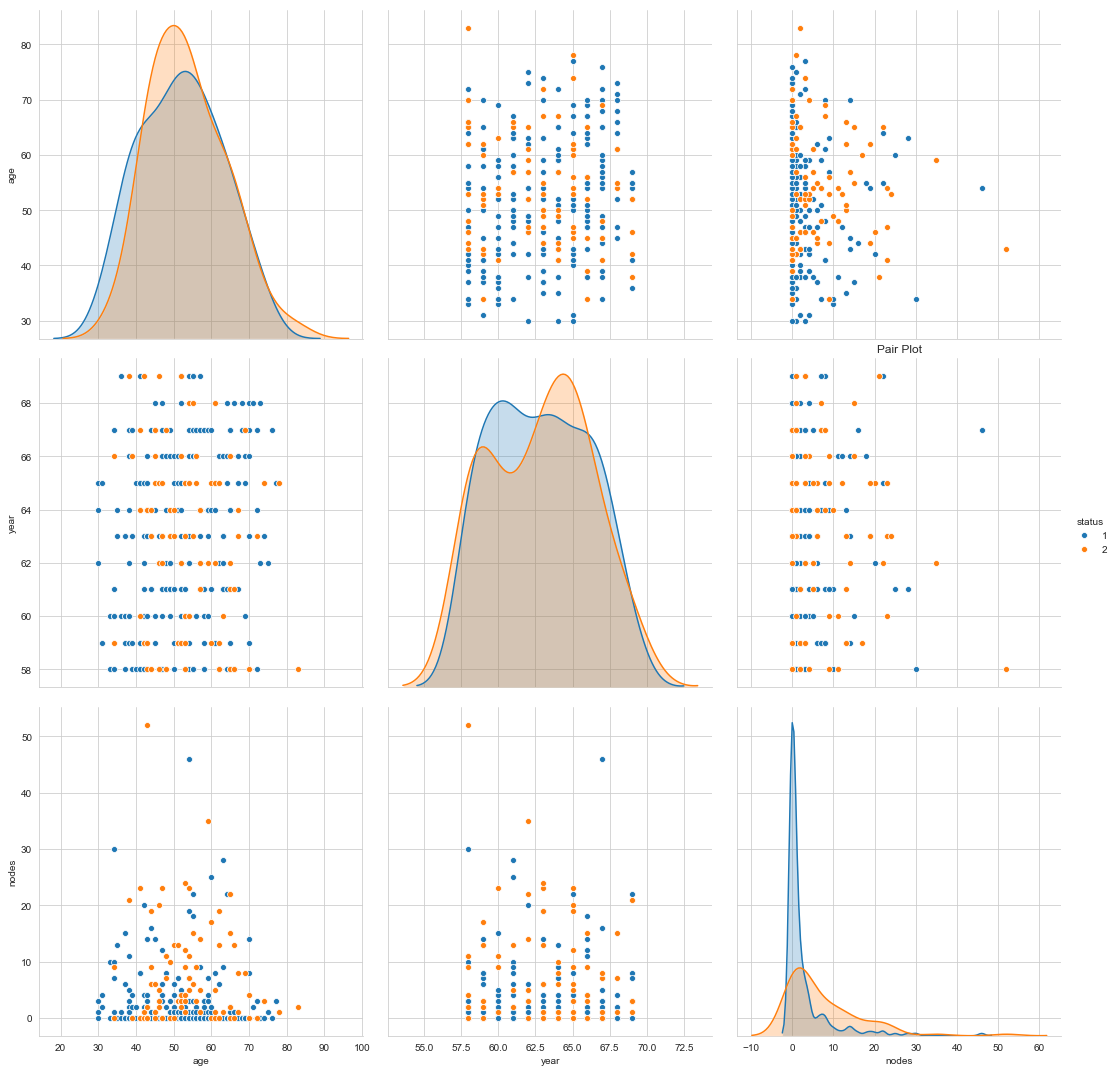

In [68]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", vars=["age", "year", "nodes"], height=5);

plt.title("Pair Plot")
plt.show()

### Conclusion

We can't conclude anything using pair plots as points are evenly scattered.

### **Ignore**
Q. Why is the species column not used in pair plots? <br/>

<u>Explanation</u>: In this dataset,<br/>
Independent variables = ‘sepal_length’, ‘sepal_width’, ‘petal_length’, ‘petal_width’<br/>
Dependent variables = ‘species’<br/>

Here all the independent variables are ‘numerical’, only the dependent variable is ‘categorical’. Pair-plots are the plots between two numerical variables. That’s the reason we don’t see ‘species’ in the pair plot.

<u>Solution</u>: We can get 3C2 plots. refer this https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pair-plots-1/#div-comment-18793